# Agenda

- Strings
- Cleaning data
- Datetimes
- Grouping + pivot tables
- Join + merge
- Plotting

URL: https://python.lerner.co.il

In [1]:
!ls *.csv

burrito_current.csv	   languages.csv  titanic3.csv
celebrity_deaths_2016.csv  taxi.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('taxi.csv')

In [4]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [5]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.00,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.00,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.00,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.00,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
5,1,2015-06-02 11:19:33,2015-06-02 11:28:48,1,1.40,-73.944641,40.779465,1,N,-73.961365,40.771561,1,8.0,0.0,0.5,1.75,0.00,0.3,10.55
6,1,2015-06-02 11:19:34,2015-06-02 11:38:46,1,1.80,-73.992867,40.748211,1,N,-73.969772,40.748459,1,12.5,0.0,0.5,3.00,0.00,0.3,16.30
7,1,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,-73.863075,40.769253,1,N,-73.986710,40.761307,1,52.5,0.0,0.5,15.00,5.54,0.3,73.84
8,2,2015-06-02 11:19:36,2015-06-02 11:45:19,1,1.27,-73.991432,40.749306,1,N,-73.985062,40.759525,2,15.0,0.0,0.5,0.00,0.00,0.3,15.80
9,1,2015-06-02 11:19:38,2015-06-02 11:23:50,1,0.60,-73.970734,40.796207,1,N,-73.977470,40.789509,1,5.0,0.0,0.5,0.50,0.00,0.3,6.30


In [6]:
# .loc -- with the index

df.loc[2]

VendorID                                   2
tpep_pickup_datetime     2015-06-02 11:19:31
tpep_dropoff_datetime    2015-06-02 11:30:30
passenger_count                            1
trip_distance                           0.87
pickup_longitude                  -73.978111
pickup_latitude                    40.738434
RateCodeID                                 1
store_and_fwd_flag                         N
dropoff_longitude                 -73.990273
dropoff_latitude                   40.745438
payment_type                               1
fare_amount                              8.0
extra                                    0.0
mta_tax                                  0.5
tip_amount                               2.2
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                            11.0
Name: 2, dtype: object

In [7]:
# .loc -- with fancy indexing

df.loc[ [2, 4]] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.2,0.0,0.3,11.0
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.0,0.0,0.3,10.3


In [8]:
# .loc -- (a) row selector, (b) column selector

df.loc[  
        [2, 4] ,   # these rows
        ['passenger_count', 'trip_distance', 'total_amount']   # these columns
]


,passenger_count,trip_distance,total_amount
2,1,0.87,11.0
4,1,1.40,10.3


In [9]:
# .loc witih a boolean index for rows

df.loc[
    df['passenger_count'] == 4     # use as a boolean index
]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
7,1,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,-73.863075,40.769253,1,N,-73.986710,40.761307,1,52.5,0.0,0.5,15.00,5.54,0.3,73.84
107,2,2015-06-02 11:20:50,2015-06-02 11:33:48,4,1.48,-73.965858,40.758888,1,N,-73.965858,40.758888,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
128,2,2015-06-02 11:21:07,2015-06-02 11:44:10,4,3.46,-73.981262,40.749622,1,N,-74.010216,40.720074,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
130,2,2015-06-02 11:21:09,2015-06-02 11:24:48,4,0.63,-73.962616,40.772381,1,N,-73.957092,40.780083,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
135,1,2015-06-02 11:21:13,2015-06-02 11:42:13,4,6.20,-73.989975,40.750702,1,N,-74.014153,40.712116,2,22.5,0.0,0.5,0.00,0.00,0.3,23.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2,2015-06-01 00:10:46,2015-06-01 00:17:33,4,1.38,-73.986282,40.755833,1,N,-73.985001,40.768688,2,7.0,0.5,0.5,0.00,0.00,0.3,8.30
9642,1,2015-06-01 00:11:41,2015-06-01 00:36:27,4,6.70,-73.984970,40.736481,1,N,-73.947731,40.657990,1,23.5,0.5,0.5,4.95,0.00,0.3,29.75
9661,1,2015-06-01 00:11:17,2015-06-01 00:28:52,4,4.50,-73.955803,40.714054,1,N,-73.953705,40.670975,1,16.5,0.5,0.5,3.56,0.00,0.3,21.36
9744,1,2015-06-01 00:12:19,2015-06-01 00:19:43,4,1.50,-73.986771,40.721313,1,N,-73.983368,40.738445,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80


In [10]:
df.loc[
    df['passenger_count'] == 4     # use as a boolean index 
    ,
    ['trip_distance', 'total_amount']
]

,trip_distance,total_amount
7,11.90,73.84
107,1.48,12.96
128,3.46,20.16
130,0.63,5.30
135,6.20,23.30
...,...,...
9565,1.38,8.30
9642,6.70,29.75
9661,4.50,21.36
9744,1.50,8.80


In [11]:
# fillna, dropna -- deal with NaN values

In [12]:
from pandas import Series, DataFrame

In [13]:
s = Series('this is a bunch of words for my course'.split())

In [14]:
s

0      this
1        is
2         a
3     bunch
4        of
5     words
6       for
7        my
8    course
dtype: object

In [15]:
# what is the length of each word?

# .str accessor

s.len()

AttributeError: 'Series' object has no attribute 'len'

In [16]:
s.str.len()   # run len() on every value

0    4
1    2
2    1
3    5
4    2
5    5
6    3
7    2
8    6
dtype: int64

# What methods do we have?

- All Python string methods
- Operators such as `[]` are implemented as methods
- Other methods from other languages

In [19]:
# I want all of the words in s whose length is greater than the mean

s.str.len() > s.str.len().mean()

0     True
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8     True
dtype: bool

In [20]:
s.loc[   s.str.len() > s.str.len().mean()     ]

0      this
3     bunch
5     words
8    course
dtype: object

In [27]:
# .str.get -- instead of []
# .str.contains -- instead of in

s.str.get(0).str.contains('a')

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [28]:
# 
s.str.get(0).str.contains('[aeiou]', regex=True)

0    False
1     True
2     True
3    False
4     True
5    False
6    False
7    False
8    False
dtype: bool

In [29]:
s = Series('10 20 30 hello 40 50 goodbye'.split())
s

0         10
1         20
2         30
3      hello
4         40
5         50
6    goodbye
dtype: object

In [30]:
s.astype(int)

ValueError: invalid literal for int() with base 10: 'hello'

In [31]:
# find all int'able strings
# keep just them
# convert to ints

s.str.isdigit()

0     True
1     True
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [33]:
s.loc[s.str.isdigit()].astype(int)

0    10
1    20
2    30
4    40
5    50
dtype: int64

In [36]:
s.loc[s.str.isdigit()].astype(int)

0    10
1    20
2    30
4    40
5    50
dtype: int64

In [38]:
# how long is our series?
len(s) #  -- how many are there?

7

In [40]:
s.count()   # how many non-NaN values are there?

7

In [41]:
# fastest answer comes from

len(s.index)

7

In [42]:
s

0         10
1         20
2         30
3      hello
4         40
5         50
6    goodbye
dtype: object

In [43]:
s.str.contains('e')

0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool

# Exercise: Working with strings

1. Ask the user to enter a string containing both integers and non-integers, with words between them.
2. What is the mean length of the words that are not digits/numbers?
3. What is the longest word from those that are not digits/numbers?
4. What is the mean of the digits/numbers we entered?

In [44]:
text = input('Enter some numbers and words: ').strip()

s = Series(text.split())


Enter some numbers and words: this is a bunch of numbers 10 15 500 30 so there


In [45]:
s

0        this
1          is
2           a
3       bunch
4          of
5     numbers
6          10
7          15
8         500
9          30
10         so
11      there
dtype: object

In [54]:
# What is the mean length of the words that are not digits/numbers?

(
    s                        # start with series of words
    .loc[~s.str.isdigit()]   # keep only non-digit words
    .str.len()               # get length of each word
    .mean()                  # calculate mean on the series of lengths
)

3.5

In [57]:
# What is the longest word from those that are not digits/numbers?

max_word_length = (
    s                        # start with series of words
    .loc[~s.str.isdigit()]   # keep only non-digit words
    .str.len()               # get length of each word
    .max()                  # calculate mean on the series of lengths
)

s.loc[s.str.len() == max_word_length]

5    numbers
dtype: object

In [60]:
# What is the mean of the digits/numbers we entered?

(
    s                        # start with series of words
    .loc[s.str.isdigit()]    # keep only digit words
    .astype(int)             # get a series of ints
    .describe()
)

count      4.000000
mean     138.750000
std      240.983229
min       10.000000
25%       13.750000
50%       22.500000
75%      147.500000
max      500.000000
dtype: float64

In [61]:
import numpy as np

s = Series([10, 20, 30, np.nan, 50, 60])
s

0    10.0
1    20.0
2    30.0
3     NaN
4    50.0
5    60.0
dtype: float64

In [62]:
s.mean()

34.0

In [64]:
# s.count -- doesn't include NaN

s.sum() / s.count()

34.0

In [65]:
# get the mean, and use instead of NaN
# fillna 

s.fillna(9999)

0      10.0
1      20.0
2      30.0
3    9999.0
4      50.0
5      60.0
dtype: float64

In [66]:
s.fillna(s.mean())    # replace the NaN values with the mean

0    10.0
1    20.0
2    30.0
3    34.0
4    50.0
5    60.0
dtype: float64

In [67]:
s = Series([10, 20, np.nan, 40, 50, 60, 70, 80, np.nan, 100])
s.fillna(s.mean())

0     10.00
1     20.00
2     53.75
3     40.00
4     50.00
5     60.00
6     70.00
7     80.00
8     53.75
9    100.00
dtype: float64

In [68]:
# interpolation
# s.interpolate

s.interpolate()

0     10.0
1     20.0
2     30.0
3     40.0
4     50.0
5     60.0
6     70.0
7     80.0
8     90.0
9    100.0
dtype: float64

In [69]:
s = Series([10, 20, np.nan, np.nan, 50, 60, 70, 80, np.nan, 100])
s

0     10.0
1     20.0
2      NaN
3      NaN
4     50.0
5     60.0
6     70.0
7     80.0
8      NaN
9    100.0
dtype: float64

In [70]:
s.interpolate()

0     10.0
1     20.0
2     30.0
3     40.0
4     50.0
5     60.0
6     70.0
7     80.0
8     90.0
9    100.0
dtype: float64

In [73]:
df = DataFrame(np.random.randint(0, 100, [4, 5]),
              index=list('abcd'),
              columns=list('vwxyz'))
df.loc['a', 'x'] = np.nan
df.loc['a', 'z'] = np.nan
df.loc['b', 'y'] = np.nan
df.loc['c', 'z'] = np.nan
df

,v,w,x,y,z
a,20,96,NaN,9.0,NaN
b,92,33,26.0,NaN,71.0
c,53,66,16.0,82.0,NaN
d,75,28,59.0,78.0,14.0


In [74]:
# dropna removes any row with *ANY* nan
df.dropna()

,v,w,x,y,z
d,75,28,59.0,78.0,14.0


In [75]:
# thresh says: how many non-NaN values do we need?
df.dropna(thresh=3)

,v,w,x,y,z
a,20,96,NaN,9.0,NaN
b,92,33,26.0,NaN,71.0
c,53,66,16.0,82.0,NaN
d,75,28,59.0,78.0,14.0


In [76]:
df.dropna(thresh=4)

,v,w,x,y,z
b,92,33,26.0,NaN,71.0
c,53,66,16.0,82.0,NaN
d,75,28,59.0,78.0,14.0


In [77]:
# we only care about NaN in column z

df.dropna(subset=['z'])

,v,w,x,y,z
b,92,33,26.0,NaN,71.0
d,75,28,59.0,78.0,14.0


In [79]:
s = Series('10a 20b 30c 40d 100e'.split())
s

0     10a
1     20b
2     30c
3     40d
4    100e
dtype: object

In [82]:
# text[start:end] is a slice in classic Python
# .str.slice does the same thing as a .str method

s.str.slice(0, -1)  # return from the start until (not including) the final character

0     10
1     20
2     30
3     40
4    100
dtype: object

In [83]:
(
    s
    .str.slice(0, -1)
    .astype(int)
)

0     10
1     20
2     30
3     40
4    100
dtype: int64

In [84]:
# what if we don't know how many letters there are, or where they are?

s = Series('ab10 c20 30 defg40hij'.split())
s

0         ab10
1          c20
2           30
3    defg40hij
dtype: object

In [87]:
s.str.replace(r'\D*(\d+)\D*', r'\1', regex=True)

0    10
1    20
2    30
3    40
dtype: object

In [89]:
import string

# remove any leading/trailing characters from ascii_lowercase
s.str.strip(string.ascii_lowercase)

0    10
1    20
2    30
3    40
dtype: object

In [90]:
s.str.strip('a')

0          b10
1          c20
2           30
3    defg40hij
dtype: object

In [91]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [92]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [93]:
help(s.str.extract)

Help on method extract in module pandas.core.strings.accessor:

extract(pat: 'str', flags: 'int' = 0, expand: 'bool' = True) -> 'DataFrame | Series | Index' method of pandas.core.strings.accessor.StringMethods instance
    Extract capture groups in the regex `pat` as columns in a DataFrame.

    For each subject string in the Series, extract groups from the
    first match of regular expression `pat`.

    Parameters
    ----------
    pat : str
        Regular expression pattern with capturing groups.
    flags : int, default 0 (no flags)
        Flags from the ``re`` module, e.g. ``re.IGNORECASE``, that
        modify regular expression matching for things like case,
        spaces, etc. For more details, see :mod:`re`.
    expand : bool, default True
        If True, return DataFrame with one column per capture group.
        If False, return a Series/Index if there is one capture group
        or DataFrame if there are multiple capture groups.

    Returns
    -------
    DataFrame

# Date and times

- Point in time -- `timestamp` or `datetime`
- Span of time -- `timedelta` or `interval`

### Date math

- `datetime` + `timedelta` = `datetime`
- `datetime` - `timedelta` = `datetime`
- `datetime` - `datetime` = `timedelta`

In [94]:
# how can we get datetime

df = pd.read_csv('taxi.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [95]:
df.dtypes 

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [96]:
# pd.to_datetime takes a series of strings as input
# and returns a series of datetime

pd.to_datetime(df['tpep_pickup_datetime'])

0      2015-06-02 11:19:29
1      2015-06-02 11:19:30
2      2015-06-02 11:19:31
3      2015-06-02 11:19:31
4      2015-06-02 11:19:32
               ...        
9994   2015-06-01 00:12:59
9995   2015-06-01 00:12:59
9996   2015-06-01 00:13:00
9997   2015-06-01 00:13:02
9998   2015-06-01 00:13:04
Name: tpep_pickup_datetime, Length: 9999, dtype: datetime64[ns]

In [97]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [98]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime            object
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [99]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [100]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [101]:
df = pd.read_csv('taxi.csv',
                 parse_dates=['tpep_pickup_datetime',
                             'tpep_dropoff_datetime'])
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [104]:
# .dt is the accessor for datetime values

df['tpep_pickup_datetime'].dt.second

0       29
1       30
2       31
3       31
4       32
        ..
9994    59
9995    59
9996     0
9997     2
9998     4
Name: tpep_pickup_datetime, Length: 9999, dtype: int32

In [109]:
df['tpep_pickup_datetime'].dt.is_month_start

0       False
1       False
2       False
3       False
4       False
        ...  
9994     True
9995     True
9996     True
9997     True
9998     True
Name: tpep_pickup_datetime, Length: 9999, dtype: bool

In [110]:
df['tpep_pickup_datetime'].dt.day_of_week

0       1
1       1
2       1
3       1
4       1
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: tpep_pickup_datetime, Length: 9999, dtype: int32

In [111]:
df['tpep_pickup_datetime'].dt.day_name()

0       Tuesday
1       Tuesday
2       Tuesday
3       Tuesday
4       Tuesday
         ...   
9994     Monday
9995     Monday
9996     Monday
9997     Monday
9998     Monday
Name: tpep_pickup_datetime, Length: 9999, dtype: object

# Exercise: Dates and taxis

1. Load `taxi.csv` into a data frame, setting `tpep_pickup_datetime` and `tpep_dropoff_datetime` as `datetime` values.
2. What was the mean `total_amount` for trips that took place before 12:00? (From 0 - 12)
3. What was the mean `trip_distance` for trips that took place on Tuesday?

In [112]:
df = pd.read_csv('taxi.csv',
                parse_dates=['tpep_pickup_datetime',
                            'tpep_dropoff_datetime'],
                usecols=['tpep_pickup_datetime',
                        'tpep_dropoff_datetime',
                        'trip_distance', 'total_amount', 'passenger_count'])
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30
...,...,...,...,...,...
9994,2015-06-01 00:12:59,2015-06-01 00:24:18,1,2.70,12.30
9995,2015-06-01 00:12:59,2015-06-01 00:28:16,1,4.50,20.30
9996,2015-06-01 00:13:00,2015-06-01 00:37:25,1,5.59,22.30
9997,2015-06-01 00:13:02,2015-06-01 00:19:10,6,1.54,7.80


In [113]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
total_amount                    float64
dtype: object

In [119]:
# 2. What was the mean `total_amount` for trips that took place before 12:00? (From 0 - 12)

(
    df
    .loc[
        df['tpep_pickup_datetime'].dt.hour < 12,     # row selector
        'total_amount']       # column selector
    .mean()
)

17.420879297732263

In [120]:


(
    df
    .loc[
        df['tpep_pickup_datetime'].dt.hour >= 12,     # row selector
        'total_amount']       # column selector
    .mean()
)

17.836744627054365

In [125]:
# 3. What was the mean `trip_distance` for trips that took place on Tuesday?

(
    df
    .loc[
        df['tpep_pickup_datetime'].dt.day_name() == 'Tuesday' ,   # row selector
        'trip_distance'  # column selector
          ]
    .mean()
)

2.6611988171064604

In [127]:
df['total_amount'][df['tpep_pickup_datetime'].dt.hour < 12].mean()


17.420879297732263

In [128]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30


In [129]:
# how not to update things!
df.loc[2]['passenger_count'] = 2

/tmp/ipykernel_684037/2829727395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[2]['passenger_count'] = 2


In [130]:
df.loc[2, 'passenger_count'] = 2

In [132]:
df['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [133]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80,0 days 00:28:23
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30,0 days 00:08:26
2,2015-06-02 11:19:31,2015-06-02 11:30:30,2,0.87,11.00,0 days 00:10:59
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16,0 days 00:19:31
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,0 days 00:13:17


In [135]:
# compare with a timedelta column 

df.loc[   df['trip_time'] > '0 days 01:00:00'   ]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
7,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,73.84,0 days 01:17:11
88,2015-06-02 11:20:37,2015-06-02 12:35:21,2,23.76,94.00,0 days 01:14:44
126,2015-06-02 11:21:03,2015-06-03 00:00:00,3,1.06,11.16,0 days 12:38:57
174,2015-06-02 11:21:42,2015-06-02 12:22:51,1,6.65,45.96,0 days 01:01:09
246,2015-06-02 11:19:46,2015-06-02 12:26:33,1,0.00,3.30,0 days 01:06:47
...,...,...,...,...,...,...
7907,2015-06-04 15:23:01,2015-06-04 16:30:03,1,26.60,96.84,0 days 01:07:02
8042,2015-06-06 16:53:20,2015-06-06 17:54:20,1,17.98,58.34,0 days 01:01:00
8171,2015-06-06 16:53:33,2015-06-06 18:01:48,1,18.01,58.34,0 days 01:08:15
8201,2015-06-06 16:53:56,2015-06-06 17:54:22,1,17.36,69.00,0 days 01:00:26


In [136]:
# we can use human-readable strings for our comparison

df.loc[   df['trip_time'] > '1 hour'   ]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
7,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,73.84,0 days 01:17:11
88,2015-06-02 11:20:37,2015-06-02 12:35:21,2,23.76,94.00,0 days 01:14:44
126,2015-06-02 11:21:03,2015-06-03 00:00:00,3,1.06,11.16,0 days 12:38:57
174,2015-06-02 11:21:42,2015-06-02 12:22:51,1,6.65,45.96,0 days 01:01:09
246,2015-06-02 11:19:46,2015-06-02 12:26:33,1,0.00,3.30,0 days 01:06:47
...,...,...,...,...,...,...
7907,2015-06-04 15:23:01,2015-06-04 16:30:03,1,26.60,96.84,0 days 01:07:02
8042,2015-06-06 16:53:20,2015-06-06 17:54:20,1,17.98,58.34,0 days 01:01:00
8171,2015-06-06 16:53:33,2015-06-06 18:01:48,1,18.01,58.34,0 days 01:08:15
8201,2015-06-06 16:53:56,2015-06-06 17:54:22,1,17.36,69.00,0 days 01:00:26


In [138]:
df.loc[   df['trip_time'] > '1 fortnight'   ]

TypeError: Invalid comparison between dtype=timedelta64[ns] and str

# Exercise: Trip times

1. Define `trip_time` to be the difference between dropoff and pickup times.
2. What were the shortest and longest trips? How much did people pay for them?
3. How many trips were longer than 4 hours?  What was the average cost?
4. How many trips were shorter than 1 minute? What was the average cost?

In [139]:
df['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80,0 days 00:28:23
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30,0 days 00:08:26
2,2015-06-02 11:19:31,2015-06-02 11:30:30,2,0.87,11.00,0 days 00:10:59
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16,0 days 00:19:31
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,0 days 00:13:17


In [140]:
# 2. What were the shortest and longest trips? How much did people pay for them?

df['trip_time'].describe()


count                         9999
mean     0 days 00:16:42.781778177
std      0 days 00:15:35.893200210
min                0 days 00:00:00
25%                0 days 00:07:33
50%                0 days 00:12:59
75%                0 days 00:21:24
max                0 days 12:38:57
Name: trip_time, dtype: object

In [146]:
df.loc[ 
    df['trip_time'] == df['trip_time'].min(),
    'total_amount'
].mean()

13.187692307692313

In [147]:
df.loc[ 
    df['trip_time'] == df['trip_time'].max(),
    'total_amount'
]

126    11.16
Name: total_amount, dtype: float64

In [150]:
df.loc[ 
    df['trip_time'].isin([df['trip_time'].max(), df['trip_time'].min()]),
    'total_amount'
]

126     11.16
297      2.30
3771     3.30
3919     3.30
4063    12.30
4103    15.30
5247    15.30
5798     3.80
7716    22.80
8168    58.34
8625     3.80
9016     6.30
9693    18.80
9761     5.80
Name: total_amount, dtype: float64

In [153]:
df.loc[ 
    ((df['trip_time'] == df['trip_time'].max()) |
     (df['trip_time'] == df['trip_time'].min()) )  ,

    'total_amount'
]

126     11.16
297      2.30
3771     3.30
3919     3.30
4063    12.30
4103    15.30
5247    15.30
5798     3.80
7716    22.80
8168    58.34
8625     3.80
9016     6.30
9693    18.80
9761     5.80
Name: total_amount, dtype: float64

In [156]:
# 3. How many trips were longer than 4 hours?  What was the average cost?

df.loc[
    df['trip_time'] > '4 hours',
    'total_amount'
].mean()

47.14

In [158]:
# 4. How many trips were shorter than 1 minute? What was the average cost?

df.loc[
    df['trip_time'] < '1 minute',
    'total_amount'
].mean()

31.93892857142858

# Datetime index



In [160]:
# we can use a datetime as an index 
# "time series"

df = df.set_index('tpep_pickup_datetime')
df

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
tpep_pickup_datetime,,,,,
2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80,0 days 00:28:23
2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30,0 days 00:08:26
2015-06-02 11:19:31,2015-06-02 11:30:30,2,0.87,11.00,0 days 00:10:59
2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16,0 days 00:19:31
2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30,0 days 00:13:17
...,...,...,...,...,...
2015-06-01 00:12:59,2015-06-01 00:24:18,1,2.70,12.30,0 days 00:11:19
2015-06-01 00:12:59,2015-06-01 00:28:16,1,4.50,20.30,0 days 00:15:17
2015-06-01 00:13:00,2015-06-01 00:37:25,1,5.59,22.30,0 days 00:24:25


In [161]:
df.loc['2015-06-01 00:13:04']

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
tpep_pickup_datetime,,,,,
2015-06-01 00:13:04,2015-06-01 00:30:41,1,6.1,21.30,0 days 00:17:37
2015-06-01 00:13:04,2015-06-01 00:36:33,1,5.8,26.75,0 days 00:23:29


In [163]:
# remove a smaller measure, and it acts as a wildcard

df.loc['2015-06-01 00:13']   # any seconds will match!

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
tpep_pickup_datetime,,,,,
2015-06-01 00:13:00,2015-06-01 00:15:34,1,0.30,5.30,0 days 00:02:34
2015-06-01 00:13:00,2015-06-01 00:22:16,1,2.50,10.80,0 days 00:09:16
2015-06-01 00:13:03,2015-06-01 01:00:50,1,19.14,70.01,0 days 00:47:47
2015-06-01 00:13:05,2015-06-01 00:18:52,1,0.97,7.30,0 days 00:05:47
2015-06-01 00:13:06,2015-06-01 00:26:26,2,3.90,18.35,0 days 00:13:20
...,...,...,...,...,...
2015-06-01 00:13:45,2015-06-01 00:36:43,1,6.37,23.30,0 days 00:22:58
2015-06-01 00:13:47,2015-06-01 00:33:03,1,4.10,18.30,0 days 00:19:16
2015-06-01 00:13:00,2015-06-01 00:37:25,1,5.59,22.30,0 days 00:24:25


In [164]:
df.loc['2015-06-01 00']   # any minutes + seconds will match, hour must be 00

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
tpep_pickup_datetime,,,,,
2015-06-01 00:00:00,2015-06-01 00:06:12,1,1.00,7.30,0 days 00:06:12
2015-06-01 00:00:02,2015-06-01 00:25:48,1,5.51,21.80,0 days 00:25:46
2015-06-01 00:00:03,2015-06-01 00:10:24,1,2.59,14.16,0 days 00:10:21
2015-06-01 00:00:01,2015-06-01 00:24:48,1,8.15,30.30,0 days 00:24:47
2015-06-01 00:00:02,2015-06-01 00:18:57,1,9.04,32.65,0 days 00:18:55
...,...,...,...,...,...
2015-06-01 00:12:59,2015-06-01 00:24:18,1,2.70,12.30,0 days 00:11:19
2015-06-01 00:12:59,2015-06-01 00:28:16,1,4.50,20.30,0 days 00:15:17
2015-06-01 00:13:00,2015-06-01 00:37:25,1,5.59,22.30,0 days 00:24:25


In [165]:
# we can use a slice for date ranges

df.loc['2015-06-01 00:13:04':'2015-06-01 00:14:00']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [166]:
df = df.sort_index()
df.loc['2015-06-01 00:13:04':'2015-06-01 00:14:00']

,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
tpep_pickup_datetime,,,,,
2015-06-01 00:13:04,2015-06-01 00:30:41,1,6.10,21.30,0 days 00:17:37
2015-06-01 00:13:04,2015-06-01 00:36:33,1,5.80,26.75,0 days 00:23:29
2015-06-01 00:13:05,2015-06-01 00:34:32,1,6.50,23.30,0 days 00:21:27
2015-06-01 00:13:05,2015-06-01 00:22:38,6,2.72,14.16,0 days 00:09:33
2015-06-01 00:13:05,2015-06-01 00:14:56,1,0.47,5.76,0 days 00:01:51
...,...,...,...,...,...
2015-06-01 00:13:45,2015-06-01 00:38:34,1,15.49,51.96,0 days 00:24:49
2015-06-01 00:13:45,2015-06-01 00:36:43,1,6.37,23.30,0 days 00:22:58
2015-06-01 00:13:46,2015-06-01 00:21:46,1,1.39,8.80,0 days 00:08:00


In [169]:
# resample

## for each hour, how many rides were there?


df.resample('1h')['passenger_count'].count().head(20)

tpep_pickup_datetime
2015-06-01 00:00:00    2439
2015-06-01 01:00:00       0
2015-06-01 02:00:00       0
2015-06-01 03:00:00       0
2015-06-01 04:00:00       0
2015-06-01 05:00:00       0
2015-06-01 06:00:00       0
2015-06-01 07:00:00       0
2015-06-01 08:00:00       0
2015-06-01 09:00:00       0
2015-06-01 10:00:00       0
2015-06-01 11:00:00       0
2015-06-01 12:00:00       0
2015-06-01 13:00:00       0
2015-06-01 14:00:00       0
2015-06-01 15:00:00       0
2015-06-01 16:00:00       0
2015-06-01 17:00:00       0
2015-06-01 18:00:00       0
2015-06-01 19:00:00       0
Freq: h, Name: passenger_count, dtype: int64

In [170]:
df.resample('8h')['passenger_count'].count().head(20)

tpep_pickup_datetime
2015-06-01 00:00:00    2439
2015-06-01 08:00:00       0
2015-06-01 16:00:00       0
2015-06-02 00:00:00       0
2015-06-02 08:00:00    4396
2015-06-02 16:00:00       0
2015-06-03 00:00:00       0
2015-06-03 08:00:00       0
2015-06-03 16:00:00       0
2015-06-04 00:00:00       0
2015-06-04 08:00:00    2536
2015-06-04 16:00:00       0
2015-06-05 00:00:00       0
2015-06-05 08:00:00       0
2015-06-05 16:00:00       0
2015-06-06 00:00:00       0
2015-06-06 08:00:00       0
2015-06-06 16:00:00     628
Freq: 8h, Name: passenger_count, dtype: int64

In [172]:
df.resample('1D')['total_amount'].mean()

tpep_pickup_datetime
2015-06-01    18.932686
2015-06-02    16.582095
2015-06-03          NaN
2015-06-04    18.556569
2015-06-05          NaN
2015-06-06    14.929936
Freq: D, Name: total_amount, dtype: float64

In [173]:
df = DataFrame(np.random.randint(0, 100, [3,3]))
df

,0,1,2
0,15,13,84
1,90,30,91
2,43,15,73


In [174]:
# df.info -- what is in this data frame?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       3 non-null      int64
 2   2       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


In [176]:
df = DataFrame(np.random.randint(0, 100, [3,3]),
               index=list('abc'),
               columns=list('xyz'))
df

,x,y,z
a,92,27,29
b,26,25,90
c,8,33,6


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       3 non-null      int64
 1   y       3 non-null      int64
 2   z       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [178]:
df['s'] = ['a', 'b', 'c']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       3 non-null      int64 
 1   y       3 non-null      int64 
 2   z       3 non-null      int64 
 3   s       3 non-null      object
dtypes: int64(3), object(1)
memory usage: 120.0+ bytes


In [179]:
df

,x,y,z,s
a,92,27,29,a
b,26,25,90,b
c,8,33,6,c


In [180]:
df.loc['c', 's'] = 'abcdefghijklmnopqrstuvwxyz' * 10_000_000

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       3 non-null      int64 
 1   y       3 non-null      int64 
 2   z       3 non-null      int64 
 3   s       3 non-null      object
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes


In [182]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       3 non-null      int64 
 1   y       3 non-null      int64 
 2   z       3 non-null      int64 
 3   s       3 non-null      object
dtypes: int64(3), object(1)
memory usage: 248.0 MB


In [183]:
df.memory_usage()

Index    132
x         24
y         24
z         24
s         24
dtype: int64

In [184]:
df.memory_usage(deep=True)

Index          258
x               24
y               24
z               24
s        260000149
dtype: int64

In [185]:
df.memory_usage(deep=True).sum()

260000479

In [186]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [187]:
!ls ../data

2020_sharing_data_outside.csv	 nyc_taxi_2020-07.csv
CPILFESL.csv			 oecd_locations.csv
albany,ny.csv			 oecd_tourism.csv
alice-in-wonderland.txt		 olympic_athlete_events.csv
boston,ma.csv			 python-survey
celebrity_deaths_2016.csv	 san+francisco,ca.csv
chicago,il.csv			 sat-scores.csv
cities.json			 skyscrapers.csv
eu_cpi.csv			 so_2021_survey_results.csv
eu_gdp.csv			 springfield,il.csv
ice-cream.csv			 springfield,ma.csv
linux-etc-passwd.txt		 taxi-distance.csv
los+angeles,ca.csv		 taxi-passenger-count.csv
miles-traveled.csv		 titanic3.xls
new+york,ny.csv			 us-median-cpi.csv
nyc-parking-violations-2020.csv  us-unemployment-rate.csv
nyc-temps.txt			 us_gdp.csv
nyc_taxi_2019-01.csv		 winemag-150k-reviews.csv
nyc_taxi_2019-07.csv		 words.txt
nyc_taxi_2020-01.csv		 wti-daily.csv


In [188]:
filename = '../data/olympic_athlete_events.csv'

df = pd.read_csv(filename)

In [189]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [190]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 158.9 MB


In [191]:
df.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [192]:
# category

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 158.9 MB


In [194]:
df['Team'] = df['Team'].astype('category')

In [195]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      271116 non-null  int64   
 1   Name    271116 non-null  object  
 2   Sex     271116 non-null  object  
 3   Age     261642 non-null  float64 
 4   Height  210945 non-null  float64 
 5   Weight  208241 non-null  float64 
 6   Team    271116 non-null  category
 7   NOC     271116 non-null  object  
 8   Games   271116 non-null  object  
 9   Year    271116 non-null  int64   
 10  Season  271116 non-null  object  
 11  City    271116 non-null  object  
 12  Sport   271116 non-null  object  
 13  Event   271116 non-null  object  
 14  Medal   39783 non-null   object  
dtypes: category(1), float64(3), int64(2), object(9)
memory usage: 144.6 MB


In [196]:
df['Team']

0                  China
1                  China
2                Denmark
3         Denmark/Sweden
4            Netherlands
               ...      
271111          Poland-1
271112            Poland
271113            Poland
271114            Poland
271115            Poland
Name: Team, Length: 271116, dtype: category
Categories (1184, object): ['30. Februar', 'A North American Team', 'Acipactli', 'Acturus', ..., 'Zefyros', 'Zimbabwe', 'Zut', 'rn-2']

In [198]:
df.describe(include='object')

,Name,Sex,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,18853,13821,222552,22426,38624,5733,13372


In [199]:
for one_column in ['Name', 'Sex', 'NOC', 'Games',
                   'Season', 'City', 'Sport', 'Event', 'Medal']:
    df[one_column] = df[one_column].astype('category')
    
df.info(memory_usage='deep')    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      271116 non-null  int64   
 1   Name    271116 non-null  category
 2   Sex     271116 non-null  category
 3   Age     261642 non-null  float64 
 4   Height  210945 non-null  float64 
 5   Weight  208241 non-null  float64 
 6   Team    271116 non-null  category
 7   NOC     271116 non-null  category
 8   Games   271116 non-null  category
 9   Year    271116 non-null  int64   
 10  Season  271116 non-null  category
 11  City    271116 non-null  category
 12  Sport   271116 non-null  category
 13  Event   271116 non-null  category
 14  Medal   39783 non-null   category
dtypes: category(10), float64(3), int64(2)
memory usage: 27.5 MB


In [200]:
!ls ../data/*.csv

../data/2020_sharing_data_outside.csv	 ../data/oecd_locations.csv
../data/CPILFESL.csv			 ../data/oecd_tourism.csv
../data/albany,ny.csv			 ../data/olympic_athlete_events.csv
../data/boston,ma.csv			 ../data/san+francisco,ca.csv
../data/celebrity_deaths_2016.csv	 ../data/sat-scores.csv
../data/chicago,il.csv			 ../data/skyscrapers.csv
../data/eu_cpi.csv			 ../data/so_2021_survey_results.csv
../data/eu_gdp.csv			 ../data/springfield,il.csv
../data/ice-cream.csv			 ../data/springfield,ma.csv
../data/los+angeles,ca.csv		 ../data/taxi-distance.csv
../data/miles-traveled.csv		 ../data/taxi-passenger-count.csv
../data/new+york,ny.csv			 ../data/us-median-cpi.csv
../data/nyc-parking-violations-2020.csv  ../data/us-unemployment-rate.csv
../data/nyc_taxi_2019-01.csv		 ../data/us_gdp.csv
../data/nyc_taxi_2019-07.csv		 ../data/winemag-150k-reviews.csv
../data/nyc_taxi_2020-01.csv		 ../data/wti-daily.csv
../data/nyc_taxi_2020-07.csv


# Exercise: Text, memory, and wine

1. Load into a data frame `../data/winemag-150k-reviews.csv`.
2. How much memory does this use? How much does it tell you the data frame uses, if you don't do a "deep" check?
3. What columns will/won't be useful with categories?
4. Convert some/all to categories, and compare with what was earlier.

In [201]:
filename = '../data/winemag-150k-reviews.csv'

df = pd.read_csv(filename)

In [203]:
df.shape

(150930, 11)

In [204]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [205]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 105.8 MB


In [206]:
!ls -lh $filename

-rw-r--r-- 1 student student 48M Jul 29  2021 ../data/winemag-150k-reviews.csv


In [207]:
df.describe(include='object')

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


In [208]:
for one_column in ['country', 'description', 'designation', 'province',
                  'region_1', 'region_2', 'variety', 'winery']:
    df[one_column]= df[one_column].astype('category')

In [209]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   150930 non-null  int64   
 1   country      150925 non-null  category
 2   description  150930 non-null  category
 3   designation  105195 non-null  category
 4   points       150930 non-null  int64   
 5   price        137235 non-null  float64 
 6   province     150925 non-null  category
 7   region_1     125870 non-null  category
 8   region_2     60953 non-null   category
 9   variety      150930 non-null  category
 10  winery       150930 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 45.8 MB


# Grouping

In [210]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [214]:
# How many points did California wines get, on average?

df.loc[df['province'] == 'California', 'points'].mean()

87.68273119439202

In [215]:
df.loc[df['province'] == 'Provence', 'points'].mean()

88.25465230166503

In [216]:
df.loc[df['province'] == 'Northern Spain', 'points'].mean()

86.78720359771054

In [217]:
# groupby -- 
# - categorical column -- what do we want to separate our queries on?
# - numerical column -- what numeric column do we want to calculate?
# - aggregation method -- what do we want to run?

#         categorical   numeric   agg method
df.groupby('province')['points'].mean()

/tmp/ipykernel_684037/1523081386.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('province')['points'].mean()


province
Achaia                   83.500000
Aconcagua Costa          89.200000
Aconcagua Valley         87.288660
Aegean                   88.500000
Ahr                      88.000000
                           ...    
Zenata                   88.500000
Zitsa                    82.000000
Österreichischer Sekt    86.450000
Štajerska                86.600000
Župa                     88.090909
Name: points, Length: 455, dtype: float64

In [220]:
df.groupby('country')['points'].mean()

/tmp/ipykernel_684037/1121479182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('country')['points'].mean()


country
Albania                   88.000000
Argentina                 85.996093
Australia                 87.892475
Austria                   89.276742
Bosnia and Herzegovina    84.750000
Brazil                    83.240000
Bulgaria                  85.467532
Canada                    88.239796
Chile                     86.296768
China                     82.000000
Croatia                   86.280899
Cyprus                    85.870968
Czech Republic            85.833333
Egypt                     83.666667
England                   92.888889
France                    88.925870
Georgia                   85.511628
Germany                   88.626427
Greece                    86.117647
Hungary                   87.329004
India                     87.625000
Israel                    87.176190
Italy                     88.413664
Japan                     85.000000
Lebanon                   85.702703
Lithuania                 84.250000
Luxembourg                87.000000
Macedonia           

In [221]:
df.groupby('country')['points'].mean().sort_values()

/tmp/ipykernel_684037/4260947682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('country')['points'].mean().sort_values()


country
South Korea               81.500000
Montenegro                82.000000
China                     82.000000
Brazil                    83.240000
Slovakia                  83.666667
Egypt                     83.666667
Lithuania                 84.250000
Uruguay                   84.478261
Ukraine                   84.600000
Moldova                   84.718310
Bosnia and Herzegovina    84.750000
Mexico                    84.761905
Macedonia                 84.812500
Romania                   84.920863
Japan                     85.000000
Bulgaria                  85.467532
Georgia                   85.511628
Lebanon                   85.702703
Czech Republic            85.833333
Cyprus                    85.870968
Argentina                 85.996093
Tunisia                   86.000000
Greece                    86.117647
Croatia                   86.280899
Chile                     86.296768
Spain                     86.646589
Luxembourg                87.000000
Israel              

# Exercise: Grouping and taxis

1. Define a data frame from `taxi.csv`
2. How much did people pay, on average, for every different `passenger_count`?
3. Calculate the tip (`tip_amount`) as a percentage of `total_fare`, and assign to `tip_percentage`. Did larger groups pay a larger percentage tip?
4. Check the mean `tip_percentage` for each value of `VendorID`

In [237]:
filename = 'taxi.csv'

df = pd.read_csv(filename, 
                 usecols=['VendorID', 'passenger_count', 'total_amount', 'tip_amount'])
df.head()

,VendorID,passenger_count,tip_amount,total_amount
0,2,1,0.00,17.80
1,2,1,1.00,8.30
2,2,1,2.20,11.00
3,2,1,2.86,17.16
4,1,1,0.00,10.30


In [238]:
df.groupby('passenger_count')['total_amount'].mean()

passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [255]:
# Calculate the tip (tip_amount) as a percentage of total_fare, 
# and assign to tip_percentage. Did larger groups pay a larger percentage tip?

df['tip_percentage'] = df['tip_amount'] / df['total_amount']

In [256]:
df.head()

,VendorID,tpep_pickup_datetime,passenger_count,tip_amount,total_amount,tip_percentage
0,2,2015-06-02 11:19:29,1,0.00,17.80,0.000000
1,2,2015-06-02 11:19:30,1,1.00,8.30,0.120482
2,2,2015-06-02 11:19:31,1,2.20,11.00,0.200000
3,2,2015-06-02 11:19:31,1,2.86,17.16,0.166667
4,1,2015-06-02 11:19:32,1,0.00,10.30,0.000000


In [257]:
df.groupby('passenger_count')['tip_percentage'].mean()

passenger_count
0    0.183127
1    0.092880
2    0.088309
3    0.087368
4    0.077067
5    0.094349
6    0.086075
Name: tip_percentage, dtype: float64

In [258]:
(df['tip_percentage'] == 0).value_counts(normalize=True)

tip_percentage
False    0.572957
True     0.427043
Name: proportion, dtype: float64

In [259]:
# Check the mean tip_percentage for each value of VendorID

df.groupby('VendorID')['tip_percentage'].mean()

VendorID
1    0.091538
2    0.091680
Name: tip_percentage, dtype: float64

In [260]:
# Pivot table

# - index == passenger_count (categorical #1)
# - columns = VendorIDS (categorical #2)
# - numeric = tip_percentage
# - aggregation method = mean

df.pivot_table(index='passenger_count',
              columns='VendorID',
              values='tip_percentage',
              aggfunc='mean')

VendorID,1,2
passenger_count,,
0,0.183127,NaN
1,0.093319,0.092330
2,0.086343,0.089924
3,0.072738,0.096592
4,0.076237,0.077550
5,0.000000,0.094896
6,NaN,0.086075


In [261]:
# 

df.groupby(['passenger_count', 'VendorID'])['tip_percentage'].mean()

passenger_count  VendorID
0                1           0.183127
1                1           0.093319
                 2           0.092330
2                1           0.086343
                 2           0.089924
3                1           0.072738
                 2           0.096592
4                1           0.076237
                 2           0.077550
5                1           0.000000
                 2           0.094896
6                2           0.086075
Name: tip_percentage, dtype: float64

In [262]:
df.groupby('VendorID')[['tip_percentage', 'total_amount']].mean()

,tip_percentage,total_amount
VendorID,,
1,0.091538,17.325272
2,0.091680,17.765027


In [263]:
df.groupby(['passenger_count', 'VendorID'])[['tip_percentage', 'total_amount']].mean()

tip_percentage  total_amount
passenger_count VendorID                              
0               1               0.183127     25.570000
1               1               0.093319     16.941386
                2               0.092330     17.904989
2               1               0.086343     19.076807
                2               0.089924     17.855770
3               1               0.072738     19.002803
                2               0.096592     17.359076
4               1               0.076237     20.518657
                2               0.077550     17.927913
5               1               0.000000     20.466667
                2               0.094896     17.192379
6               2               0.086075     17.401355

In [264]:
df.pivot_table(index='passenger_count',
              columns='VendorID',
              values=['tip_percentage', 'total_amount'],
              aggfunc='mean')

tip_percentage           total_amount           
VendorID                     1         2            1          2
passenger_count                                                 
0                     0.183127       NaN    25.570000        NaN
1                     0.093319  0.092330    16.941386  17.904989
2                     0.086343  0.089924    19.076807  17.855770
3                     0.072738  0.096592    19.002803  17.359076
4                     0.076237  0.077550    20.518657  17.927913
5                     0.000000  0.094896    20.466667  17.192379
6                          NaN  0.086075          NaN  17.401355

In [265]:
df.pivot_table(index='passenger_count',
              columns='VendorID',
              values=['tip_percentage', 'total_amount'],
              aggfunc=['mean', 'std'])

mean                                    \
                tip_percentage           total_amount              
VendorID                     1         2            1          2   
passenger_count                                                    
0                     0.183127       NaN    25.570000        NaN   
1                     0.093319  0.092330    16.941386  17.904989   
2                     0.086343  0.089924    19.076807  17.855770   
3                     0.072738  0.096592    19.002803  17.359076   
4                     0.076237  0.077550    20.518657  17.927913   
5                     0.000000  0.094896    20.466667  17.192379   
6                          NaN  0.086075          NaN  17.401355   

                           std                                    
                tip_percentage           total_amount             
VendorID                     1         2            1          2  
passenger_count                                                   
0                     0.023862       NaN    15.301791        NaN  
1                     0.086191  0.085638    15.369459  15.167490  
2                     0.084387  0.086208    16.049125  15.233530  
3                     0.082974  0.088289    15.389968  12.540837  
4                     0.124135  0.085855    15.845568  14.630713  
5                     0.000000  0.084446     6.751543  14.064202  
6                          NaN  0.086273          NaN  13.363827

In [269]:
filename = 'taxi.csv'

df = pd.read_csv(filename, 
                 usecols=['tpep_pickup_datetime', 
                          'VendorID', 'passenger_count', 'total_amount', 'tip_amount'],
                 parse_dates=['tpep_pickup_datetime'])

df['tip_percentage'] = df['tip_amount'] / df['total_amount']

In [270]:
df.pivot_table(index=['passenger_count', df['tpep_pickup_datetime'].dt.hour],
              columns='VendorID',
              values=['tip_percentage', 'total_amount'],
              aggfunc=['mean', 'std'])

mean                         \
                                     tip_percentage           total_amount   
VendorID                                          1         2            1   
passenger_count tpep_pickup_datetime                                         
0               0                          0.166254       NaN    36.390000   
                15                         0.200000       NaN    14.750000   
1               0                          0.089552  0.085090    18.603721   
                11                         0.098665  0.098608    15.950106   
                15                         0.088620  0.091257    17.596173   
                16                         0.088458  0.078121    14.334159   
2               0                          0.092190  0.087722    20.047152   
                11                         0.087756  0.090854    19.809118   
                15                         0.079539  0.088200    18.695754   
                16                         0.087149  0.097572    15.150862   
3               0                          0.092746  0.092288    15.671538   
                11                         0.064347  0.105309    22.202364   
                15                         0.073807  0.096051    20.541667   
                16                         0.055418  0.077444    13.731905   
4               0                          0.102519  0.074044    18.405000   
                11                         0.081385  0.090011    22.010000   
                15                         0.054272  0.061140    21.882222   
                16                         0.047486  0.053225    17.334286   
5               0                          0.000000  0.091509    27.300000   
                11                              NaN  0.097540          NaN   
                15                         0.000000  0.100231    20.300000   
                16                         0.000000  0.065671    13.800000   
6               0                               NaN  0.099570          NaN   
                11                              NaN  0.093097          NaN   
                15                              NaN  0.069144          NaN   
                16                              NaN  0.072306          NaN   

                                                           std            \
                                                tip_percentage             
VendorID                                      2              1         2   
passenger_count tpep_pickup_datetime                                       
0               0                           NaN            NaN       NaN   
                15                          NaN            NaN       NaN   
1               0                     19.033278       0.085462  0.085185   
                11                    16.750798       0.084903  0.085297   
                15                    19.416051       0.086568  0.085741   
                16                    16.198229       0.096072  0.086143   
2               0                     18.479045       0.080745  0.083541   
                11                    16.926013       0.084534  0.088172   
                15                    19.427010       0.084862  0.085123   
                16                    15.376481       0.092175  0.088520   
3               0                     18.461940       0.087160  0.084636   
                11                    17.484535       0.077914  0.088722   
                15                    16.656622       0.085921  0.088463   
                16                    15.872727       0.080308  0.098597   
4               0                     22.537273       0.198620  0.087944   
                11                    15.592069       0.087984  0.087769   
                15                    20.688077       0.077204  0.080569   
                16                    13.740000       0.081097  0.082845   
5               0                 

# Exercise: Pivot table

1. Create a data frame from `../data/winemag-150k-reviews.csv`
2. Create a pivot table with columns = countries, index  = variety, values = points, and get the mean. Which country/variety combination gives the highest score?


In [1]:
filename = '../data/winemag-150k-reviews.csv'

In [2]:
!head $filename

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,,Tinta de Toro,Bodega Carmen Rodríguez
2,US,"Mac Watson honors the memory 

In [4]:
import pandas as pd

df = pd.read_csv('../data/winemag-150k-reviews.csv')

# Visualization / plotting

 - Matplotlib

In [8]:
# get the 10 highest-scoring wine countries

df.groupby('country')['points'].mean().sort_values().tail(10)

country
Portugal    88.057685
Turkey      88.096154
Morocco     88.166667
Slovenia    88.234043
Canada      88.239796
Italy       88.413664
Germany     88.626427
France      88.925870
Austria     89.276742
England     92.888889
Name: points, dtype: float64

<Axes: xlabel='country'>

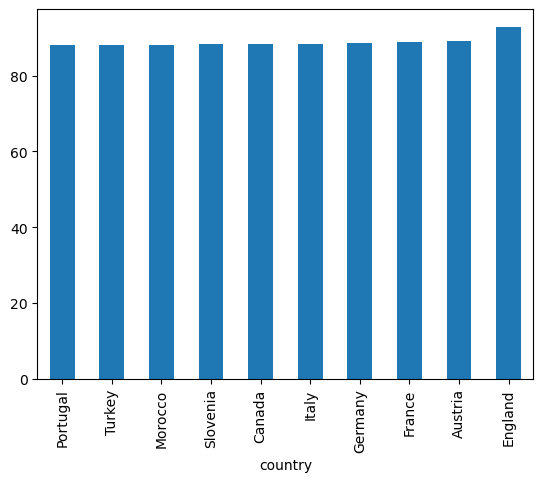

In [9]:
# plot.bar

df.groupby('country')['points'].mean().sort_values().tail(10).plot.bar()

<Axes: ylabel='country'>

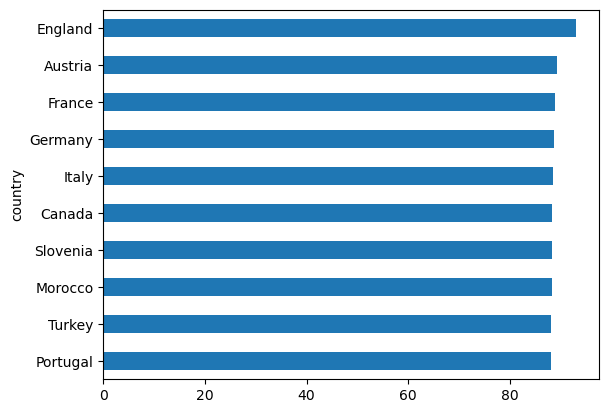

In [10]:
# horizontal bar plot 

df.groupby('country')['points'].mean().sort_values().tail(10).plot.barh()

<Axes: xlabel='country'>

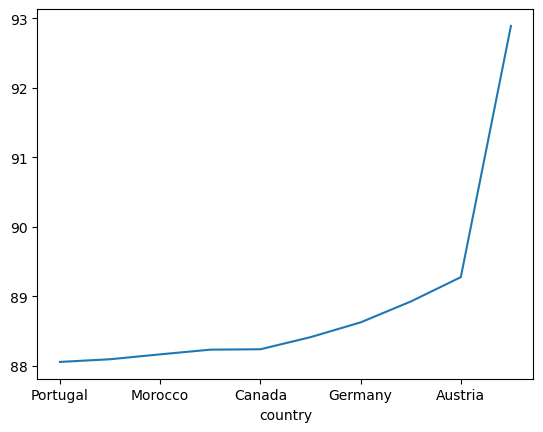

In [11]:
# plot.line 

df.groupby('country')['points'].mean().sort_values().tail(10).plot.line()

In [13]:
!ls ../data/*.csv

../data/2020_sharing_data_outside.csv	 ../data/oecd_locations.csv
../data/CPILFESL.csv			 ../data/oecd_tourism.csv
../data/albany,ny.csv			 ../data/olympic_athlete_events.csv
../data/boston,ma.csv			 ../data/san+francisco,ca.csv
../data/celebrity_deaths_2016.csv	 ../data/sat-scores.csv
../data/chicago,il.csv			 ../data/skyscrapers.csv
../data/eu_cpi.csv			 ../data/so_2021_survey_results.csv
../data/eu_gdp.csv			 ../data/springfield,il.csv
../data/ice-cream.csv			 ../data/springfield,ma.csv
../data/los+angeles,ca.csv		 ../data/taxi-distance.csv
../data/miles-traveled.csv		 ../data/taxi-passenger-count.csv
../data/new+york,ny.csv			 ../data/us-median-cpi.csv
../data/nyc-parking-violations-2020.csv  ../data/us-unemployment-rate.csv
../data/nyc_taxi_2019-01.csv		 ../data/us_gdp.csv
../data/nyc_taxi_2019-07.csv		 ../data/winemag-150k-reviews.csv
../data/nyc_taxi_2020-01.csv		 ../data/wti-daily.csv
../data/nyc_taxi_2020-07.csv


In [17]:
filename = '../data/new+york,ny.csv'

df = pd.read_csv(filename, index_col='date_time',
                parse_dates=['date_time'])

In [18]:
df.head()

,"new+york,ny_maxtempC","new+york,ny_mintempC","new+york,ny_totalSnow_cm","new+york,ny_sunHour","new+york,ny_uvIndex","new+york,ny_uvIndex.1","new+york,ny_moon_illumination","new+york,ny_moonrise","new+york,ny_moonset","new+york,ny_sunrise",...,"new+york,ny_WindChillC","new+york,ny_WindGustKmph","new+york,ny_cloudcover","new+york,ny_humidity","new+york,ny_precipMM","new+york,ny_pressure","new+york,ny_tempC","new+york,ny_visibility","new+york,ny_winddirDegree","new+york,ny_windspeedKmph"
date_time,,,,,,,,,,,,,,,,,,,,,
2018-12-11 00:00:00,4,-1,0.0,8.7,2,0,21,10:27 AM,08:28 PM,07:10 AM,...,0,12,0,56,0.0,1023,0,10,20,10
2018-12-11 03:00:00,4,-1,0.0,8.7,2,0,21,10:27 AM,08:28 PM,07:10 AM,...,1,9,0,56,0.0,1022,0,10,17,8
2018-12-11 06:00:00,4,-1,0.0,8.7,2,0,21,10:27 AM,08:28 PM,07:10 AM,...,0,9,0,63,0.0,1022,-1,10,35,8
2018-12-11 09:00:00,4,-1,0.0,8.7,2,2,21,10:27 AM,08:28 PM,07:10 AM,...,4,6,2,56,0.0,1021,1,10,41,5
2018-12-11 12:00:00,4,-1,0.0,8.7,2,2,21,10:27 AM,08:28 PM,07:10 AM,...,4,7,6,55,0.0,1018,3,10,242,6


In [19]:
df['new+york,ny_maxtempC']

date_time
2018-12-11 00:00:00    4
2018-12-11 03:00:00    4
2018-12-11 06:00:00    4
2018-12-11 09:00:00    4
2018-12-11 12:00:00    4
                      ..
2019-03-11 09:00:00    6
2019-03-11 12:00:00    6
2019-03-11 15:00:00    6
2019-03-11 18:00:00    6
2019-03-11 21:00:00    6
Name: new+york,ny_maxtempC, Length: 728, dtype: int64

<Axes: xlabel='date_time'>

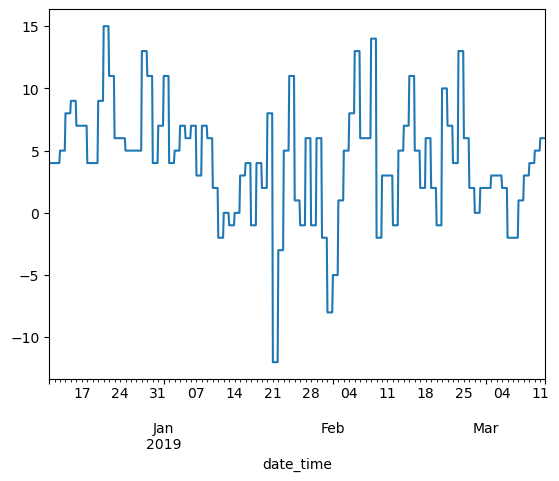

In [20]:
df['new+york,ny_maxtempC'].plot.line()

<Axes: xlabel='date_time'>

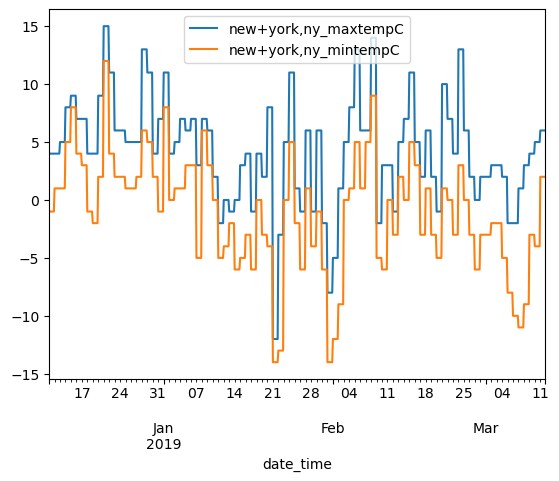

In [23]:
df[['new+york,ny_maxtempC',
    'new+york,ny_mintempC']].plot.line()

<Axes: title={'center': 'New York temps'}, xlabel='date_time'>

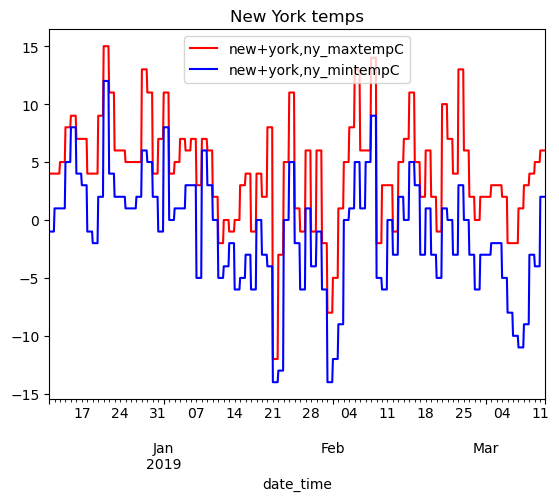

In [24]:
df[['new+york,ny_maxtempC',
    'new+york,ny_mintempC']].plot.line(title='New York temps',
                                      color=['red', 'blue'])

<Axes: title={'center': 'New York temps'}, xlabel='date_time'>

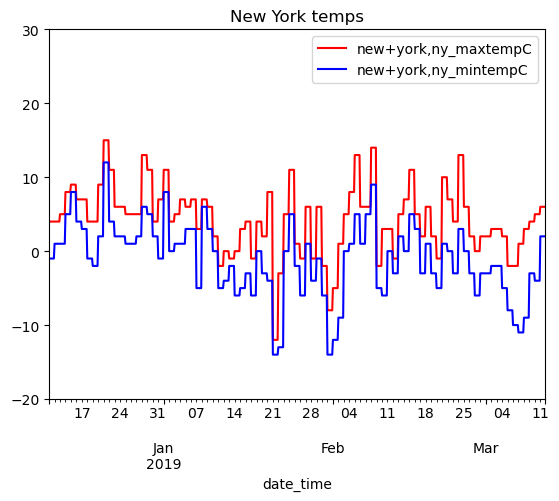

In [25]:
df[['new+york,ny_maxtempC',
    'new+york,ny_mintempC']].plot.line(title='New York temps',
                                      color=['red', 'blue'],
                                      ylim=(-20, 30))

<Axes: title={'center': 'New York temps'}, xlabel='date_time'>

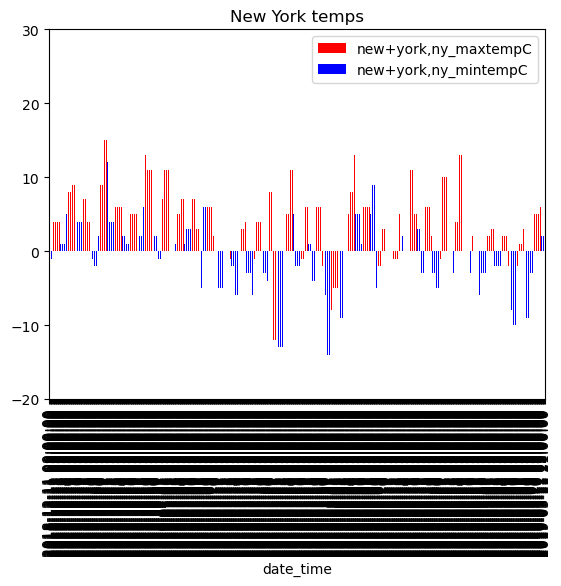

In [26]:
df[['new+york,ny_maxtempC',
    'new+york,ny_mintempC']].plot.bar(title='New York temps',
                                      color=['red', 'blue'],
                                      ylim=(-20, 30))

<Axes: title={'center': 'New York temps'}, xlabel='date_time'>

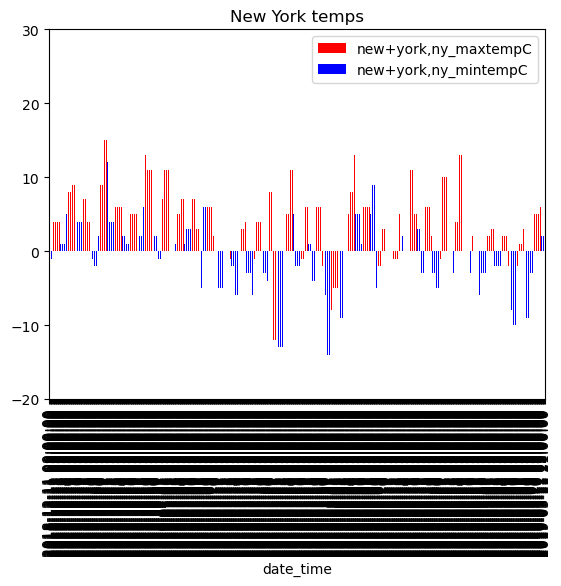

In [27]:
df[['new+york,ny_maxtempC',
    'new+york,ny_mintempC']].plot.bar(title='New York temps',
                                      color=['red', 'blue'],
                                      ylim=(-20, 30))

In [28]:
help(df.plot.bar)

Help on method bar in module pandas.plotting._core:

bar(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Vertical bar plot.

    A bar plot is a plot that presents categorical data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.

    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array-like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:

In [29]:
from pandas import DataFrame, Series

In [30]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

In [36]:
df.head()

,"new+york,ny_maxtempC","new+york,ny_mintempC","new+york,ny_totalSnow_cm","new+york,ny_sunHour","new+york,ny_uvIndex","new+york,ny_uvIndex.1","new+york,ny_moon_illumination","new+york,ny_moonrise","new+york,ny_moonset","new+york,ny_sunrise",...,"new+york,ny_WindChillC","new+york,ny_WindGustKmph","new+york,ny_cloudcover","new+york,ny_humidity","new+york,ny_precipMM","new+york,ny_pressure","new+york,ny_tempC","new+york,ny_visibility","new+york,ny_winddirDegree","new+york,ny_windspeedKmph"
date_time,,,,,,,,,,,,,,,,,,,,,
2018-12-11 00:00:00,4,-1,0.0,8.7,2,0,21,10:27 AM,08:28 PM,07:10 AM,...,0,12,0,56,0.0,1023,0,10,20,10
2018-12-11 03:00:00,4,-1,0.0,8.7,2,0,21,10:27 AM,08:28 PM,07:10 AM,...,1,9,0,56,0.0,1022,0,10,17,8
2018-12-11 06:00:00,4,-1,0.0,8.7,2,0,21,10:27 AM,08:28 PM,07:10 AM,...,0,9,0,63,0.0,1022,-1,10,35,8
2018-12-11 09:00:00,4,-1,0.0,8.7,2,2,21,10:27 AM,08:28 PM,07:10 AM,...,4,6,2,56,0.0,1021,1,10,41,5
2018-12-11 12:00:00,4,-1,0.0,8.7,2,2,21,10:27 AM,08:28 PM,07:10 AM,...,4,7,6,55,0.0,1018,3,10,242,6


In [37]:
df.columns

Index(['new+york,ny_maxtempC', 'new+york,ny_mintempC',
       'new+york,ny_totalSnow_cm', 'new+york,ny_sunHour',
       'new+york,ny_uvIndex', 'new+york,ny_uvIndex.1',
       'new+york,ny_moon_illumination', 'new+york,ny_moonrise',
       'new+york,ny_moonset', 'new+york,ny_sunrise', 'new+york,ny_sunset',
       'new+york,ny_DewPointC', 'new+york,ny_FeelsLikeC',
       'new+york,ny_HeatIndexC', 'new+york,ny_WindChillC',
       'new+york,ny_WindGustKmph', 'new+york,ny_cloudcover',
       'new+york,ny_humidity', 'new+york,ny_precipMM', 'new+york,ny_pressure',
       'new+york,ny_tempC', 'new+york,ny_visibility',
       'new+york,ny_winddirDegree', 'new+york,ny_windspeedKmph'],
      dtype='object')

<Axes: xlabel='date_time'>

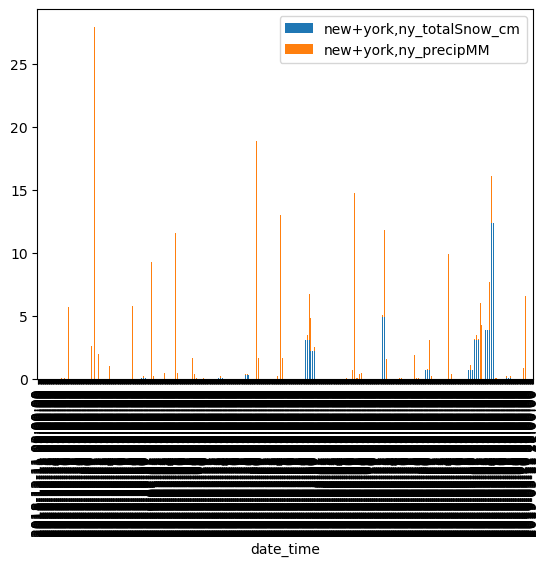

In [40]:
df[['new+york,ny_totalSnow_cm',
   'new+york,ny_precipMM']].plot.bar(stacked=True)

<Axes: ylabel='Frequency'>

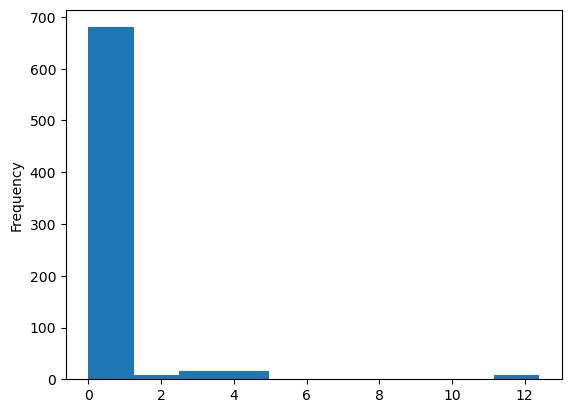

In [41]:
df['new+york,ny_totalSnow_cm'].plot.hist()

<Axes: ylabel='Frequency'>

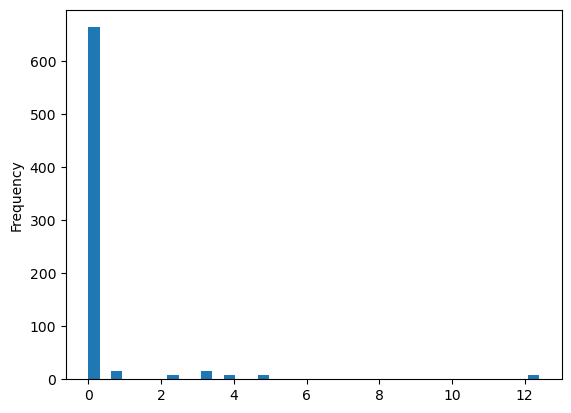

In [42]:
df['new+york,ny_totalSnow_cm'].plot.hist(bins=40)

<Axes: ylabel='Frequency'>

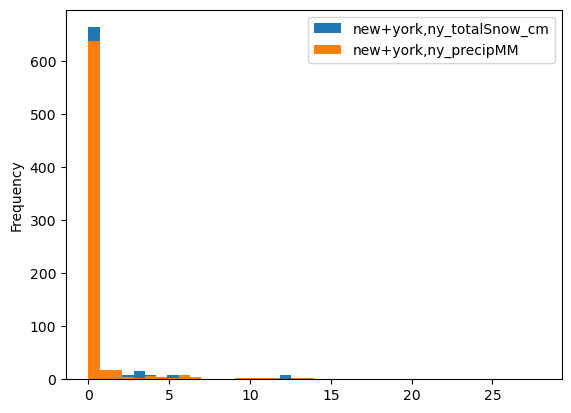

In [43]:
df[['new+york,ny_totalSnow_cm',
   'new+york,ny_precipMM']].plot.hist(bins=40)

In [ ]:
df[['new+york,ny_totalSnow_cm',
   'new+york,ny_precipMM']].plot.hist(bins=40, color=['red', 'blue'],
                                     alpha=0.3)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

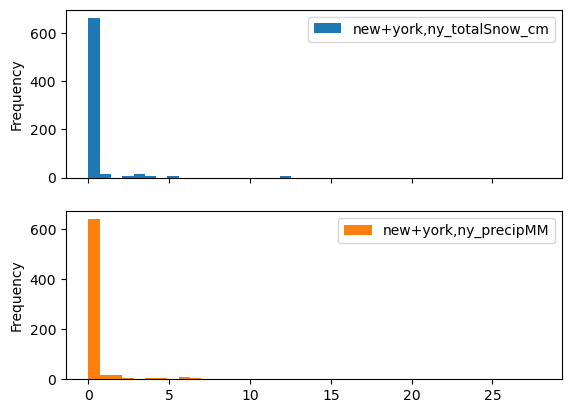

In [44]:
df[['new+york,ny_totalSnow_cm',
   'new+york,ny_precipMM']].plot.hist(bins=40, subplots=True)

# Exercise: Plots

1. Load `taxi.csv` into a data frame.
2. Show a histogram of hours of the day when people took taxis.
3. Show a histogram of the `total_amount` people spent for rides with 1-3 people.
4. Show a bar plot with *all* parts of the fare (taxes, fees, tips -- but not `total_amount`) stacked for the first 20 rides in the data set.

In [4]:
import pandas as pd

filename = 'taxi.csv'

df = pd.read_csv(filename,
                parse_dates=['tpep_pickup_datetime'])



<Axes: ylabel='Frequency'>

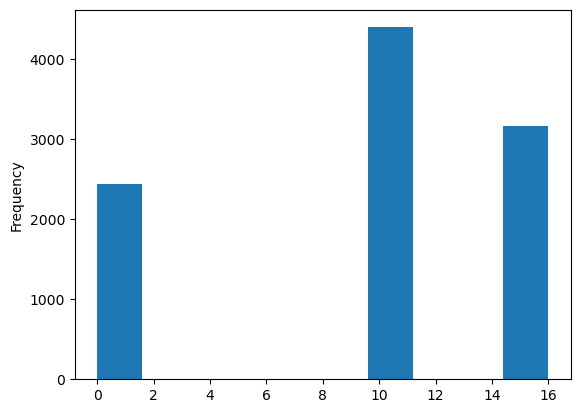

In [6]:
df['tpep_pickup_datetime'].dt.hour.plot.hist()

<Axes: ylabel='Frequency'>

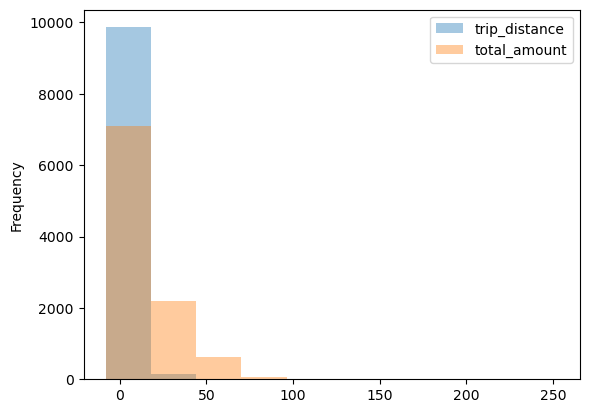

In [9]:
df[ ['trip_distance', 'total_amount'] ].plot.hist(alpha=0.4)

<Axes: ylabel='Frequency'>

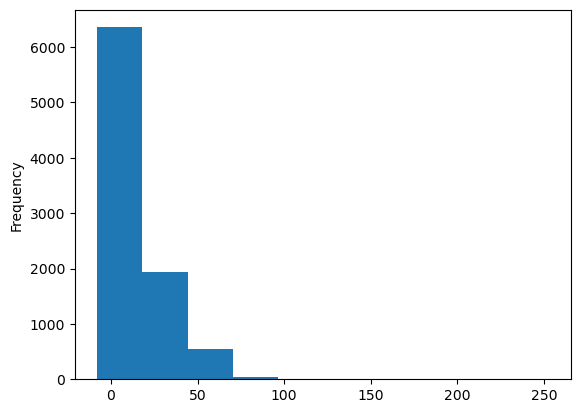

In [12]:
# 3. Show a histogram of the `total_amount` people spent for rides with 1-3 people.

(
    df
    .loc [
        df['passenger_count'].isin([1,2,3])  ,
        'total_amount'
    ]
    .plot.hist()
)


<Axes: >

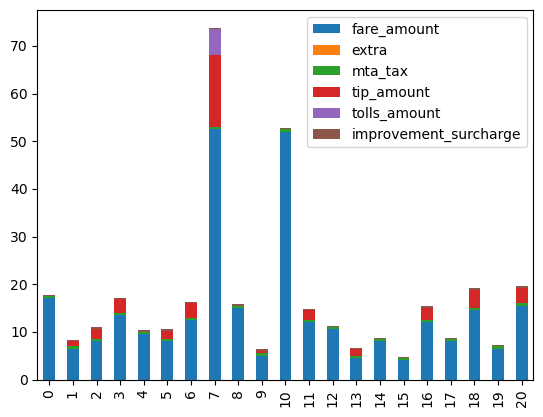

In [14]:
# 4. Show a bar plot with *all* parts of the fare (taxes, fees, tips -- 
# but not `total_amount`) stacked for the first 20 rides in the data set.

df.loc[ :20,
         ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
         'improvement_surcharge']].plot.bar(stacked=True)